In [1]:
import pandas as pd

In [2]:
pwd

'/Users/carollong/Desktop/OptimalTransport/CovidProject'

In [83]:
april1Cases = pd.read_csv('04-01-2020.csv')
print(april1Cases.head())
print(april1Cases.columns)
print(april1Cases.shape)

      FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-04-01 21:58:49   
1  22001.0     Acadia       Louisiana             US  2020-04-01 21:58:49   
2  51001.0   Accomack        Virginia             US  2020-04-01 21:58:49   
3  16001.0        Ada           Idaho             US  2020-04-01 21:58:49   
4  19001.0      Adair            Iowa             US  2020-04-01 21:58:49   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707          4       0          0       0   
1  30.295065  -92.414197         47       1          0       0   
2  37.767072  -75.632346          7       0          0       0   
3  43.452658 -116.241552        195       3          0       0   
4  41.330756  -94.471059          1       0          0       0   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  


In [84]:
print(april1Cases.iloc[1996]) #need to take out
print(len(april1Cases))

FIPS                                   NaN
Admin2                          Unassigned
Province_State                    New York
Country_Region                          US
Last_Update            2020-04-01 21:58:49
Lat                                      0
Long_                                    0
Confirmed                                0
Deaths                                 565
Recovered                                0
Active                                   0
Combined_Key      Unassigned, New York, US
Name: 1996, dtype: object
2483


In [85]:
#filter entries with New York in Province_State, filter out the above entry
april1Cases = april1Cases.drop(april1Cases.index[1996])
Filter = april1Cases.Province_State.str.contains("New York", na = False)
filteredDF = april1Cases[Filter]
print(len(filteredDF))

57


In [86]:
print(filteredDF.head())

        FIPS       Admin2 Province_State Country_Region          Last_Update  \
20   36001.0       Albany       New York             US  2020-04-01 21:58:49   
28   36003.0     Allegany       New York             US  2020-04-01 21:58:49   
197  36007.0       Broome       New York             US  2020-04-01 21:58:49   
313  36009.0  Cattaraugus       New York             US  2020-04-01 21:58:49   
314  36011.0       Cayuga       New York             US  2020-04-01 21:58:49   

           Lat      Long_  Confirmed  Deaths  Recovered  Active  \
20   42.600603 -73.977239        240       1          0       0   
28   42.257484 -78.027505         10       1          0       0   
197  42.159032 -75.813261         42       3          0       0   
313  42.247782 -78.679231          7       0          0       0   
314  42.912617 -76.557316          4       0          0       0   

                  Combined_Key  
20        Albany, New York, US  
28      Allegany, New York, US  
197       Broome,

In [87]:
# Add a column of "TotalCases"
filteredDF["TotalCases"] = filteredDF["Confirmed"] + filteredDF["Deaths"] + filteredDF["Recovered"]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
#Add a column of percentage of total cases "Weights" prob
sumCases = filteredDF["TotalCases"].sum()
#filteredDF["Weights"] = filteredDF["TotalCases"]/sumCases
filteredDF.loc[:,"Weights"] =filteredDF.loc[:,"TotalCases"]/sumCases

In [89]:
filteredDF = filteredDF.sort_values(by ='Weights' , ascending=False)

<BarContainer object of 57 artists>

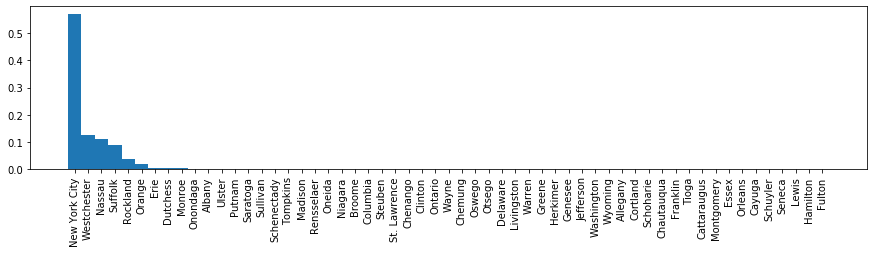

In [90]:
import numpy as np
import matplotlib.pylab as pl
pl.figure(1, figsize=(15, 3))
pl.xticks(rotation=90)
pl.bar(filteredDF["Admin2"], filteredDF["Weights"],  width=1)


In [91]:
print(filteredDF.head())

         FIPS         Admin2 Province_State Country_Region  \
1434  36061.0  New York City       New York             US   
2134  36119.0    Westchester       New York             US   
1417  36059.0         Nassau       New York             US   
1878  36103.0        Suffolk       New York             US   
1695  36087.0       Rockland       New York             US   

              Last_Update        Lat      Long_  Confirmed  Deaths  Recovered  \
1434  2020-04-01 21:58:49  40.767273 -73.971526      47439    1139          0   
2134  2020-04-01 21:58:49  41.162784 -73.757417      10683      25          0   
1417  2020-04-01 21:58:49  40.740665 -73.589419       9554      76          0   
1878  2020-04-01 21:58:49  40.883201 -72.801217       7605      53          0   
1695  2020-04-01 21:58:49  41.150279 -74.025605       3321      18          0   

      Active                 Combined_Key  TotalCases   Weights  
1434       0  New York City, New York, US       48578  0.569336  
2134    

In [92]:
import ot
import ot.plot
# k = 9  # number of Diracs of the barycenter, number of testing sites
# d = 2
# X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
# b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)
# measures_locations = []
# coordinates = filteredDF[["Lat","Long_"]]
# measures_locations.append(np.array(coordinates.values.tolist())) 
# measures_weights = []
# measures_weights.append(filteredDF["Weights"].values)
# X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

In [93]:
# print(X)

In [94]:
#Take out NYC, reassign weights
filteredDF2 = filteredDF.iloc[1:]

sumCases = filteredDF2["TotalCases"].sum()
filteredDF2.loc[:,"Weights"] =filteredDF2.loc[:,"TotalCases"]/sumCases

<BarContainer object of 56 artists>

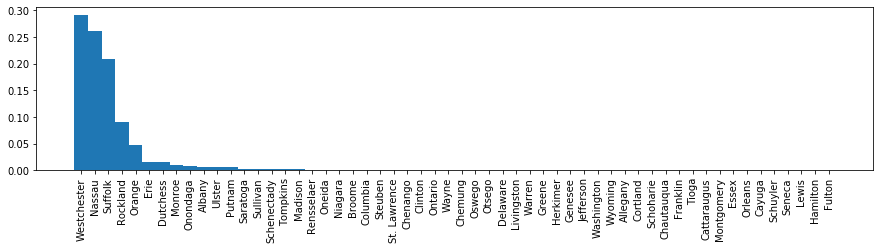

In [95]:
pl.figure(2, figsize=(15, 3))
pl.xticks(rotation=90)
pl.bar(filteredDF2["Admin2"], filteredDF2["Weights"],  width=1)

In [96]:
#Sanity check
filteredDF2.iloc[1,13] += 1-np.sum(filteredDF2["Weights"])
np.sum(filteredDF2["Weights"])

1.0

In [97]:
k = 50  # number of Diracs of the barycenter, number of testing sites
d = 2
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)
measures_locations = []
coordinates = filteredDF2[["Lat","Long_"]]
measures_locations.append(np.array(coordinates.values.tolist())) 
measures_weights = []
measures_weights.append(filteredDF2["Weights"].values)
X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

In [98]:

# print(len(measures_locations[0][0]))
# print(len(measures_weights[0][0]))
print(measures_locations)
#print(measures_weights[0])
# print(X_init.shape)
# print(b)

[array([[ 41.16278376, -73.75741653],
       [ 40.74066522, -73.58941873],
       [ 40.88320119, -72.8012172 ],
       [ 41.15027894, -74.02560498],
       [ 41.40337468, -74.30240757],
       [ 42.76249024, -78.73063652],
       [ 41.7648606 , -73.74356679],
       [ 43.14638895, -77.69322942],
       [ 43.00491923, -76.19971155],
       [ 42.60060306, -73.97723916],
       [ 41.89027881, -74.26252104],
       [ 41.42630093, -73.74965532],
       [ 43.10904162, -73.86653895],
       [ 41.71579493, -74.76394559],
       [ 42.81668777, -74.05278291],
       [ 42.44945765, -76.47229843],
       [ 42.91653905, -75.67266639],
       [ 42.71348136, -73.51089874],
       [ 43.24375382, -75.43710392],
       [ 43.19898042, -78.74777412],
       [ 42.15903158, -75.81326086],
       [ 42.24819348, -73.63089095],
       [ 42.2689144 , -77.3829924 ],
       [ 44.4976179 , -75.06550039],
       [ 42.49430041, -75.60887553],
       [ 44.74530905, -73.67875352],
       [ 42.85145728, -77.30874425],


In [99]:
#note: two overlaps
print(X)
print(type(X[0]))

[[ 41.15079688 -74.01449676]
 [ 40.88320119 -72.8012172 ]
 [ 40.74066522 -73.58941873]
 [ 40.88320119 -72.8012172 ]
 [ 40.94174188 -73.66944468]
 [ 41.16278376 -73.75741653]
 [ 41.16278376 -73.75741653]
 [ 40.88320119 -72.8012172 ]
 [ 42.78795927 -78.65511954]
 [ 40.74066522 -73.58941873]
 [ 40.88320119 -72.8012172 ]
 [ 40.88320119 -72.8012172 ]
 [ 42.43812426 -75.1105145 ]
 [ 40.74066522 -73.58941873]
 [ 41.16278376 -73.75741653]
 [ 41.16278376 -73.75741653]
 [ 41.16278376 -73.75741653]
 [ 41.15027894 -74.02560498]
 [ 42.76355987 -73.89541422]
 [ 40.74066522 -73.58941873]
 [ 41.63787805 -73.74600913]
 [ 41.16278376 -73.75741653]
 [ 40.88320119 -72.8012172 ]
 [ 41.16278376 -73.75741653]
 [ 41.16278376 -73.75741653]
 [ 41.16278376 -73.75741653]
 [ 40.74066522 -73.58941873]
 [ 40.74066522 -73.58941873]
 [ 40.74066522 -73.58941873]
 [ 40.80055624 -73.2582308 ]
 [ 41.2553716  -74.14054141]
 [ 40.74066522 -73.58941873]
 [ 41.16278376 -73.75741653]
 [ 41.16278376 -73.75741653]
 [ 41.16278376

In [100]:
print(np.array(coordinates.iloc[0]))

[ 41.16278376 -73.75741653]


In [101]:
#current drive-through locations
locations = ["Niagara", "Erie", "Broome", "Monroe", "Oneida", "Westchester", "Rockland", "Suffolk","Nassau", "Orange"]
currentCenters = []
for i in range(len(filteredDF2)):
    if filteredDF2.Admin2.iloc[i] in locations:
        currentCenters.append((coordinates.iloc[i].values.tolist()))
currentCenters = np.array(currentCenters)

In [102]:
print(np.array(currentCenters))

[[ 41.16278376 -73.75741653]
 [ 40.74066522 -73.58941873]
 [ 40.88320119 -72.8012172 ]
 [ 41.15027894 -74.02560498]
 [ 41.40337468 -74.30240757]
 [ 42.76249024 -78.73063652]
 [ 43.14638895 -77.69322942]
 [ 43.24375382 -75.43710392]
 [ 43.19898042 -78.74777412]
 [ 42.15903158 -75.81326086]]


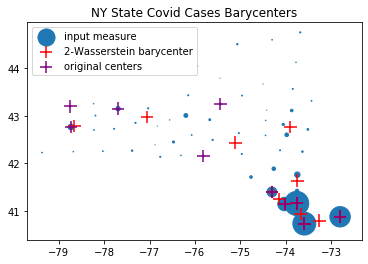

In [105]:
pl.figure(3)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    #color = 15
    pl.scatter(x_i[:, 1], x_i[:, 0], s=b_i * 2000, label='input measure')
pl.scatter(X[:, 1], X[:, 0], s=b * 8000, c='red', marker='+', label='2-Wasserstein barycenter')
pl.scatter(currentCenters[:, 1], currentCenters[:, 0], s=b * 8000, c='purple', marker='+', label='original centers')
pl.title('NY State Covid Cases Barycenters')
pl.legend(loc=0)
pl.show()

In [24]:
#